
Распознаем рукописную цифру, написанную на листе от руки.

Последовательность шагов:
1. На бумаге рисуем произвольную цифру (желательно нарисовать цифру размером не более 5 * 5 мм и без наклона)
2. Фотографируем
3. Загружаем фото
4. С помощью функции image.load_img(path, target_size=(28, 28), color_mode = ‘grayscale’) загружаем картинку в переменную.
5. С помощью функции image.img_to_array(img) преобразуем изображение в numpy-массив.
6. Выполняем инверсию цветов, нормирование и решейп массива.
7. Выполняем распознавание собственной рукописной цифры.


**импорт библиотек**

In [1]:
# импорт библиотек
from tensorflow.keras.datasets import mnist # библиотека mnist из датасетов 
from tensorflow.keras.models import Sequential # класс Sequential из моделей 
from tensorflow.keras.layers import Dense # полносвязный слой Dense из слоев 
from tensorflow.keras.optimizers import Adam # оптимизатор из оптимайзеров
from tensorflow.keras import utils # утилиты для функции to_categorical 
from tensorflow.keras.preprocessing import image # для отрисовки изображения
import numpy as np # библиотека numpy
import pylab # библитека для графиков
from mpl_toolkits.mplot3d import Axes3D # построение трехмерных графиков
from google.colab import files # работа с файлами в google colab
import matplotlib.pyplot as plt # отрисовка изображений
from PIL import Image # отрисовка изображений
# отрисовывать графики в том же окне
%matplotlib inline

**Загрузка базы mnist**

In [2]:
# загрузка данных mnist
(x_train_org, y_train_org), (x_test_org, y_test_org) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


**Нормирование и преобразование x_train и y_train**

In [3]:
# изменим размерность numpy массивов входных данных с 3-м мерных на 2-х мерные, 
# т.к. нам нужны 1 мерные массивы из векторов этих картинок
# и сохраним изменные входные данные в новые "иксы"
x_train = x_train_org.reshape(-1, 784) # 60000x784
x_test = x_test_org.reshape(-1, 784) # 10000x784
print('Новая размерность x_train:', x_train.shape)
print('Новая размерность x_test:', x_test.shape)

Новая размерность x_train: (60000, 784)
Новая размерность x_test: (10000, 784)


In [4]:
# нормирование и преобразование типа в float входных данных обучающей и проверочной выборки
# в x_train и x_test сохраним значение в долях от максимального (максимум пикселя это 255)
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

In [5]:
# преобразуем метки классов в категориальные методом One-Hot Encoding
# для классов обучающей и проверочной выборки
y_train = utils.to_categorical(y_train_org, 10) # для 10 классов 
y_test = utils.to_categorical(y_test_org, 10)   # для 10 классов

**Создание нейронной сети**

In [6]:
model = Sequential()                                    # создаем модель прямого распространения
model.add(Dense(800, input_dim=784, activation='relu')) # полносвязный слой, 800 нейронов, 784 параметра, активация relu
model.add(Dense(400, activation='relu'))                # полносвязный слой, 400 нейронов, активация relu
model.add(Dense(10,  activation='softmax'))             # полносвязный слой, 10 нейронов, активация softmax(суммарное значение равно 1)

In [7]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy']) # компилируем модель
print(model.summary())                                                                 # вывод структуры модели

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 800)               628000    
                                                                 
 dense_1 (Dense)             (None, 400)               320400    
                                                                 
 dense_2 (Dense)             (None, 10)                4010      
                                                                 
Total params: 952,410
Trainable params: 952,410
Non-trainable params: 0
_________________________________________________________________
None


**Обучение нейронной сети**

In [8]:
# x_train, y_train - входные и выходные данные обучающей выборки
# batch_size - количество примеров после которых изменяем веса
# epochs - количество итераций выполняемых со всей обучающей выборкой
# verbose - выводить ход обучения
model.fit(x_train, y_train, batch_size=128, epochs=15, verbose=1)

# сохраним модель
#model.save_weights('model.h5')


Epoch 1/15
469/469 [==============================] - 4s 4ms/step - loss: 0.2050 - accuracy: 0.9392
Epoch 2/15
469/469 [==============================] - 2s 4ms/step - loss: 0.0757 - accuracy: 0.9760
Epoch 3/15
469/469 [==============================] - 2s 4ms/step - loss: 0.0466 - accuracy: 0.9853
Epoch 4/15
469/469 [==============================] - 2s 4ms/step - loss: 0.0344 - accuracy: 0.9889
Epoch 5/15
469/469 [==============================] - 2s 4ms/step - loss: 0.0252 - accuracy: 0.9919
Epoch 6/15
469/469 [==============================] - 2s 4ms/step - loss: 0.0203 - accuracy: 0.9931
Epoch 7/15
469/469 [==============================] - 2s 4ms/step - loss: 0.0185 - accuracy: 0.9938
Epoch 8/15
469/469 [==============================] - 2s 4ms/step - loss: 0.0189 - accuracy: 0.9937
Epoch 9/15
469/469 [==============================] - 2s 4ms/step - loss: 0.0136 - accuracy: 0.9954
Epoch 10/15
469/469 [==============================] - 2s 3ms/step - loss: 0.0120 - accuracy: 0.9959

**Распознаем свою картинку**

In [9]:
# загрузим в окружение свои файлы для распознавания 
# цифры в цвете написанные от руки и сфотографированные с листка бумаги
!wget http://m.ric.media/nu/2.jpg  # цифра 2
!wget http://m.ric.media/nu/8.jpg  # цифра 8


--2021-11-21 18:32:14--  http://m.ric.media/nu/2.jpg
Resolving m.ric.media (m.ric.media)... 176.213.150.19
Connecting to m.ric.media (m.ric.media)|176.213.150.19|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 22370 (22K) [image/jpeg]
Saving to: ‘2.jpg’

2.jpg               100%[===================>]  21.85K  --.-KB/s    in 0.07s   

2021-11-21 18:32:14 (296 KB/s) - ‘2.jpg’ saved [22370/22370]

--2021-11-21 18:32:14--  http://m.ric.media/nu/8.jpg
Resolving m.ric.media (m.ric.media)... 176.213.150.19
Connecting to m.ric.media (m.ric.media)|176.213.150.19|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 21952 (21K) [image/jpeg]
Saving to: ‘8.jpg’

8.jpg               100%[===================>]  21.44K  --.-KB/s    in 0.07s   

2021-11-21 18:32:14 (301 KB/s) - ‘8.jpg’ saved [21952/21952]



In [10]:
# напишем функцию загрузки вектора из картинки и вывода результата распознавания
def print_pred(f_name):
  # загружаем заранее скачанную картинку из окружения в переменную
  # делаем resize до 28х28 и переводим в grayscale
  img = image.load_img(f_name, target_size=(28, 28), color_mode = 'grayscale')
  print('Оригинальная картинка')
  plt.imshow(img.convert('RGB'))  # отрисовка картинки
  plt.show()                      # вывод картинки
  
  # преобразуем изображение в numpy-массив
  arr = image.img_to_array(img).reshape(1, 784) # получаем массив 1х784
  # вычитаем из 255 значение цвета в grayscale и получаем инверсию цвета
  for i in range(arr.shape[1]):
    arr[0,i] = 255-arr[0,i] 
  print('Картинка после инверсии цветов')
  plt.imshow(Image.fromarray(arr.reshape(28,28)).convert('RGB')) # отрисовка картинки
  plt.show()                                                     # вывод картинки
  #print(arr.shape)
  #print(arr.dtype)

  # нормирование значений для нейросети
  # из-за шумов (цвет и оттенок бумаги на котором написана цифра) возьмем среднее значение как фон
  # любое затемнение исходной картинки(или любое высветление у инверсированной картинки) более чем у фона и есть линия надписи
  x = (arr - np.mean(arr)) / np.std(arr) # берем в долях: отклонение от среднего к стандартному отклонению
  x[x<0] = 0                             # все значения с отрицательным отклонением(цвет ниже среднего значения фона) отметим как ноль  
  # отобразим картинку после нормирования с усилением цвета, т.к. мы привели к значениям от 0 до 1, то умножим элементы массива на 70
  print('Картинка после нормирования значений от шумов (усиленная)')
  plt.imshow(Image.fromarray((x*70).reshape(28,28)).convert('RGB')) # отрисовка картинки
  plt.show()                                                        # вывод картинки

  pred = model.predict(x)[0]
  print('Распознанное значение:', np.argmax(pred))
  print('Значение вероятности:', pred[np.argmax(pred)])
  print()


Оригинальная картинка


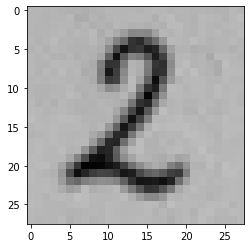

Картинка после инверсии цветов


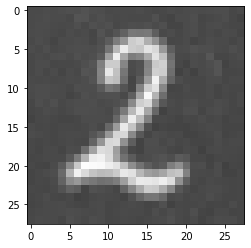

Картинка после нормирования значений от шумов (усиленная)


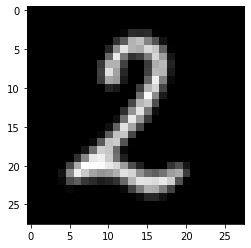

Распознанное значение: 2
Значение вероятности: 1.0

Оригинальная картинка


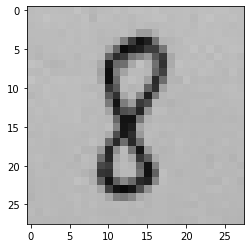

Картинка после инверсии цветов


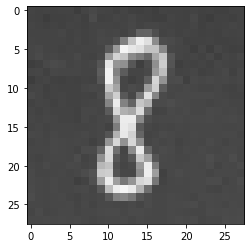

Картинка после нормирования значений от шумов (усиленная)


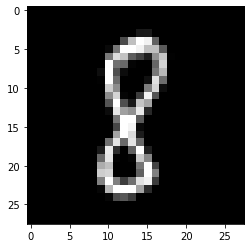

Распознанное значение: 8
Значение вероятности: 1.0



In [11]:
# имена файлов для распознавания
files_to_predict = '2.jpg', '8.jpg',

# перебираем файлы и выводим отчет по каждому
for f in files_to_predict:
  print_pred(f)


# Выводы:

После попытки распознать картинки, которые идеально отцентрованы и с практически нулевым наклоном написания, стало очевидно что необходима более тщательная нормализация исходной картинки. Например, фон может быть не достаточно белым, что создает шум для нейросети, отличие фона от линии цифры не достаточно значимо. 

**После более тщательного нормирования качество распознавания значительно улучшилось.**